In [ ]:
import gensim
import jieba
import pandas as pd
import os 
from gensim.models.doc2vec import Doc2Vec
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import TfidfModel, Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
with open("/content/drive/MyDrive/pyFile/gen/stop.txt", 'r', encoding='utf-8') as f:
  lines = f.readlines()
stop_list = [i.strip('\r\n') for i in lines]
stop_set = set(stop_list)

In [ ]:
df = pd.read_csv(
'/content/drive/MyDrive/微信公众号新闻.csv',encoding = 'utf-8')
document_column_name = '正文'
pattern = u'[\\s\\d,.<>/?:;\'\"[\\]{}()\\|~!\t"@#$%^&*\\-_=+a-zA-Z，。\n《》、？：；“”‘’｛｝【】（）…￥！—┄－]+'
re_sub = re.compile(' +')
df = df.drop_duplicates()
df = df.dropna()
df = df.rename(columns={
    document_column_name: 'text'
})
print(len(df))
#df=df[df['text'].apply(lambda x: len(str(x))>100)]
print(len(df))
# 去重、去缺失、分词
df['cut'] = df['text'].apply(lambda x: str(x))
df['cut'] = df['cut'].apply(lambda x: re.sub(pattern, ' ', x))
df['cut'] = df['cut'].apply(lambda x: " ".join(jieba.lcut(x)))
df['cut'] = df['cut'].apply(lambda x: re.sub(re_sub, ' ', x))
print(df['cut'])
print(len(set(df['cut'].to_list())))

6282
6282
0        的 旅程 已经 结束 的 未来 拉开 了 帷幕 新 的 一年 里 请 对 自己 好 一点 ...
1       距离 春节 还有 一个多月 的 时间 在线 旅游 网站 的 春节 机票 销售 火爆 部分 航...
2        万平方公里 的 祖国 大地 四季 都 有 独特 美景 冬天 的 旅行 也 别 有 一番 风...
3       长 按 二维码 关注 我们 中心 联系人 林小姐 刘小姐 罗 小姐 陈小姐 市区 联系人 柯...
4                                                        
                              ...                        
6281    由市 创文 巩卫办 市 教育局 联合 主办 的 小手 拉大 手 · 文明 随手 拍 活动 举...
6282    重要 论述 年 月 日 邓小平 会见 缅甸 总统 缅甸 国务委员会 主席 吴山友 谈到 国际...
6283    近日 农业 农村部 官网 公布 了 第二批 全国 乡村 治理 示范 村镇 名单 其中 高州市...
6284    由市 创文 巩卫办 市 教育局 联合 主办 的 小手 拉大 手 · 文明 随手 拍 活动 举...
6285    重要 论述 年 月 日 邓小平 会见 缅甸 总统 缅甸 国务委员会 主席 吴山友 谈到 国际...
Name: cut, Length: 6282, dtype: object
6185


In [ ]:
print

In [ ]:
result = []
for each in df['cut']:
  each_result = [word for word in each.split() if word not in stop_set]
  result.append(' '.join(each_result))
print(result[0])

旅程 结束 未来 拉开 帷幕 新 一年 里 请 一点 一辈子 很长 漫漫 人生 路上 人和事 一辈子 短 一年 一年 时光 悄悄 指缝间 溜走 有限 生命 里 享受 人生 强求 缘分 遇见 总会 遇见 留不住 过客 终将 远走 有缘 相守 心怀 感恩 无缘 结交 坦然 放手 强求 自由 随缘 陪伴 家人 站 身后 家人 时 坚强 后盾 给予 无条件 支持 孤独 无助 时 避风港 默默 付出 不求 回报 时间 留 一点 家人 需 陪伴 珍惜 朋友 时光流逝 仿佛 大浪淘沙 留下来 真心 朋友 不多不少 刚刚 三五 知己 小酌 几杯 君子之交 虽淡 贵在 真心 足矣 工作 新 一年 里 投入 工作 付出 回报 工作 会为 搭 梦想 人生价值 之间 桥梁 工作 辜负 爱护 身体 健康 体魄 本钱 闲暇 时 散散步 锻炼 身体 自律 健康 作息 身体 负责 走走 心灵 放松 远行 城市 里 拥挤 高楼 令人 迷茫 走走 行万里路 感受 万里 风光 体验 形色 人生 未来 到来 新 一年 愿 想要 明天 终将 到来 精彩 线路 关注 茂名 交投 旅游 集散中心 站 前 四路 交委 车站 一楼 中心 联系人 林小姐 刘小姐 罗 小姐 陈小姐 市区 联系人 柯 小姐 柯 吴小姐 梁小姐 邓 电白 分部 蔡 小姐 高州 分部 唐小姐 化州 分部 马先生 李小姐 信宜 分部 陈小姐 谢小姐


In [ ]:
TaggededDocument = gensim.models.doc2vec.TaggedDocument

In [ ]:
x_train=[]
for i,text in enumerate(result):
  word_list = text.split(' ')
  l = len(word_list)
  word_list[l-1] = word_list[l-1].strip()
  document = TaggededDocument(word_list,tags=[i])
  x_train.append(document)

In [ ]:
model = Doc2Vec(x_train,min_count=1,window=5,size=800,sample=1e-3,nagative=5,workers=2,iter=10)
model.train(x_train,total_examples=model.corpus_count,epochs=10)

In [ ]:
doc2vecData = pd.DataFrame(data=model.docvecs.vectors_docs)

In [ ]:
from sklearn.decomposition import PCA
from sklearn import metrics
#pca = PCA(n_components=100)  # 降维
#TnewData = pca.fit_transform(doc2vecData)  # 载入N维
TnewData = doc2vecData
numClasses = []
scores = []
for i in range(2,21):
  numClass = i  # 聚类分几簇
  numClasses.append(i)
  clf = KMeans(n_clusters=numClass, max_iter=10000, init="k-means++", tol=1e-6)  # 这里也可以选择随机初始化init="random"
  s = clf.fit(TnewData)
  score = metrics.silhouette_score(TnewData,clf.labels_)
  #score = np.sqrt(clf.inertia_)
  print(score)
  scores.append(score)

0.20148754
0.21387799
0.13400438
0.071858004
0.05640751
0.053749025
0.0561569
0.03771461
0.032348465
0.022879988
0.02131498
0.023869181
0.013135633
0.013683167
0.018731339
0.011445418
0.014839227
-0.0163837
-0.015368462


In [ ]:
 # 中文字体乱码
 !wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
 import matplotlib.pyplot as plt
 import matplotlib as mpl
 zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
 plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

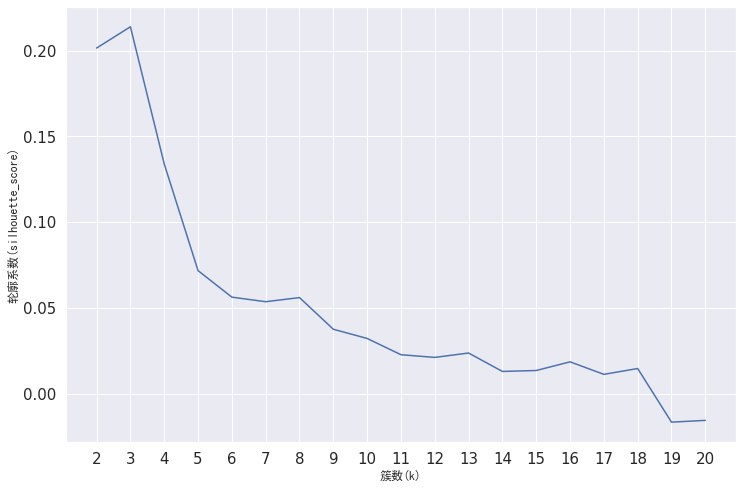

In [ ]:
import seaborn as sns
sns.set(font=zhfont.get_name())
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'
sns.set()
plt.figure(figsize=(12, 8))
plt.plot(numClasses,scores)
plt.xticks(range(2,21,1),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('簇数(k)', fontsize=20,fontproperties=zhfont)
plt.ylabel('轮廓系数(silhouette_score)', fontsize=20,fontproperties=zhfont)
plt.show()

In [ ]:
def plot_cluster(result, newData, numClass):
    plt.figure(2)
    Lab = [[] for i in range(numClass)]
    index = 0
    for labi in result:
        Lab[labi].append(index)
        index += 1
    color = ['oy', 'ob', 'og', 'cs', 'ms', 'bs', 'ks', 'ys', 'yv', 'mv', 'bv', 'kv', 'gv', 'y^', 'm^', 'b^', 'k^',
             'g^'] * 3
    for i in range(numClass):
        x1 = []
        y1 = []
        for ind1 in newData[Lab[i]]:
            # print ind1
            try:
                y1.append(ind1[1])
                x1.append(ind1[0])
            except:
                pass
        plt.plot(x1, y1, color[i])

    # 绘制初始中心点
    x1 = []
    y1 = []
    for ind1 in clf.cluster_centers_:
        try:
            y1.append(ind1[1])
            x1.append(ind1[0])
        except:
            pass
    plt.plot(x1, y1, "rv")  # 绘制中心
    plt.show()

PCA与TSEN降维


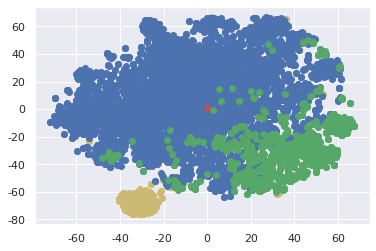

In [ ]:
numClass = 3
print('PCA与TSEN降维')
clf = KMeans(n_clusters=numClass, max_iter=10000, init="k-means++", tol=1e-6).fit(TnewData)  # 这里也可以选择随机初始化init="random"
newData = PCA(n_components=50).fit_transform(TnewData)  # 载入N维
newData = TSNE(2).fit_transform(newData)
result = list(clf.predict(TnewData))
plot_cluster(result, newData, numClass)
df['class'] = result
df.to_csv('期.csv',index = False)